张吉祺 16340286

In [33]:
import nltk
with open('data/text_en.txt') as f:
    text = f.read()

## 分词
分词方法1: TreebankWordTokenizer 依据 Penn Treebank 语料库的约定，通过分离缩略词来实现切分

In [26]:
nltk.word_tokenize(text)[:20]

['\ufeff',
 'The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Pride',
 'and',
 'Prejudice',
 ',',
 'by',
 'Jane',
 'Austen',
 'Chapter',
 '1',
 'It',
 'is',
 'a',
 'truth',
 'universally']

分词方法2: WordPunctTokenizer 通过分离标点来实现切分的，每一个单词都会被保留

In [32]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tokenizer.tokenize(text)[:20]

['\ufeff',
 'The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Pride',
 'and',
 'Prejudice',
 ',',
 'by',
 'Jane',
 'Austen',
 'Chapter',
 '1',
 'It',
 'is',
 'a',
 'truth',
 'universally']

其他分词方法: RegexpTokenizer、WhitespaceTokenizer、BlanklineTokenizer 等

In [31]:
from nltk.tokenize import BlanklineTokenizer
tokenizer = BlanklineTokenizer()
tokenizer.tokenize(text)[:2]

['\ufeff\nThe Project Gutenberg EBook of Pride and Prejudice, by Jane Austen',
 'Chapter 1']

## 提取词干
词干提取可以被定义为一个通过去除单词中的词缀以获取词干的过程。以单词 raining 为例，词干提取器通过从 raining 中去除词缀来返回其词根或词干 rain。为了提高信息检索的 准确性，搜索引擎大多会使用词干提取来获取词干并将其存储为索引词。

方法1: 在 NLTK 中使用 PorterStemmer 类进行词干

In [40]:
from nltk.stem import PorterStemmer
stemmerporter = PorterStemmer()
stemmerporter.stem('happiness')

'happi'

方法2: LancasterStemmer 类在 NLTK 中用于实现 Lancaster 词干提取算法

In [52]:
from nltk.stem import LancasterStemmer
stemmerlan=LancasterStemmer()
stemmerlan.stem('happiness')

'happy'

方法3: 在 NLTK 中，我们通过使用 RegexpStemmer 类也可以构建属于我们自己的词干提取器。它的工作原理是通过接收一个字符串，并在找到其匹配的单词时删除该单词的前缀或后缀

In [57]:
from nltk.stem import RegexpStemmer
stemmerreg = RegexpStemmer('ing$|s$|e$|able$', min=4)
stemmerreg.stem('cars')

'car'

In [99]:
words = nltk.word_tokenize(text)

## 去停用词
在信息检索中，为节省存储空间和提高搜索效率，在处理自然语言数据（或文本）之前或之后会自动过滤掉某些字或词

In [97]:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
print(words[:20])
[word for word in words[:20] if word.lower() not in stops]

['\ufeff', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Pride', 'and', 'Prejudice', ',', 'by', 'Jane', 'Austen', 'Chapter', '1', 'It', 'is', 'a', 'truth', 'universally']


['\ufeff',
 'Project',
 'Gutenberg',
 'EBook',
 'Pride',
 'Prejudice',
 ',',
 'Jane',
 'Austen',
 'Chapter',
 '1',
 'truth',
 'universally']

## 标点符号过滤

In [129]:
import string
import re
illegal_char = string.punctuation
print(illegal_char)
pattern = re.compile('[%s]' % re.escape(illegal_char))
meaningful = [pattern.sub(u'', word) for word in words if pattern.sub(u'', word)]
meaningful[:20]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['\ufeff',
 'The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Pride',
 'and',
 'Prejudice',
 'by',
 'Jane',
 'Austen',
 'Chapter',
 '1',
 'It',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged']

In [143]:
from nltk.probability import FreqDist
fdist = FreqDist(words)

## 低频词过滤

In [152]:
print(words[:20])
[word for word in words[:20] if fdist[word] > 20]

['\ufeff', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Pride', 'and', 'Prejudice', ',', 'by', 'Jane', 'Austen', 'Chapter', '1', 'It', 'is', 'a', 'truth', 'universally']


['The', 'of', 'and', ',', 'by', 'Jane', 'Chapter', 'It', 'is', 'a', 'truth']

## 绘制离散图
查看指定单词 ( Elizabeth, Darcy, Wickham, Bingley, Jane ) 在文中的分布位置

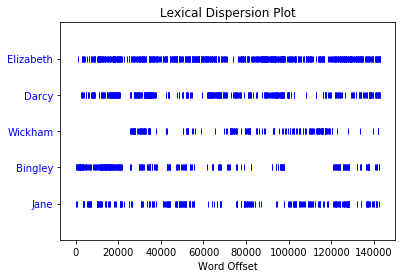

In [160]:
from nltk.text import Text
Text(words).dispersion_plot(
    ['Elizabeth', 'Darcy', 'Wickham', 'Bingley', 'Jane'])

## 对前 20 个有意义的高频词，绘制频率分布图

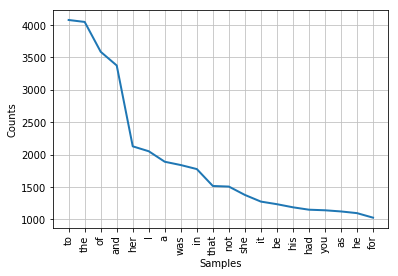

In [135]:
FreqDist(meaningful).plot(20)